In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline
import os
import glob
import matplotlib.dates as mdates

In [2]:
if os.environ['COMPUTERNAME'] == 'DESKTOP-EQAO3M5':
  computer_flag = 'home'
else:
  computer_flag = 'office'

if computer_flag == 'home':
  file_dir = "F:/github/pythonScript/seafog/"
else:
  file_dir = "H:/github/python/seafog/"

In [3]:
globPath = file_dir+'data/G7425/*.txt'
all_files = glob.glob(globPath)
all_files

['F:/github/pythonScript/seafog/data/G7425\\G7425-202012.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202101.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202102.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202103.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202104.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202105.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202106.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202107.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202108.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202201.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202202.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202203.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202204.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202205.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-202206.txt',
 'F:/github/pythonScript/seafog/data/G7425\\G7425-20220

In [4]:
ds_list = []
for i_file in all_files:
    ids = pd.read_csv(i_file,sep=',',na_values=[9999.0, -9999.0],dtype={"ObserveTime":str})
    ds_list.append(ids)
ds = pd.concat(ds_list)
print(ds)

      ObserveTime  WindSpeed  WindDirect  Rain  MaxWindSpeed  MaxWindDirect  \
0    202012230000        3.2        38.0   0.0           4.3           56.0   
1    202012230010        3.6        46.0   0.0           4.3           56.0   
2    202012230020        3.3        41.0   0.0           4.4           46.0   
3    202012230030        3.7        49.0   0.0           4.5           43.0   
4    202012230040        3.7        56.0   0.0           4.5           46.0   
..            ...        ...         ...   ...           ...            ...   
727  202301311900        6.3        76.0   0.0           8.7           70.0   
728  202301312000        6.7        78.0   0.0           8.2           83.0   
729  202301312100        6.5        79.0   0.0           8.1           84.0   
730  202301312200        5.6        76.0   0.0           7.3           90.0   
731  202301312300        4.0        71.0   0.0           6.6           73.0   

     Temperature  RelativeHumidity  Pressure  Curre

In [5]:
ds['date'] = pd.to_datetime(ds['ObserveTime'])
ds.index = ds['date']
ds['ObserveTime'] = ds['date']

In [6]:
ds.columns

Index(['ObserveTime', 'WindSpeed', 'WindDirect', 'Rain', 'MaxWindSpeed',
       'MaxWindDirect', 'Temperature', 'RelativeHumidity', 'Pressure',
       'CurrentDirect', 'CurrentSpeed', 'SeaTemperature', '202103010000',
       '5.8', '86.0', '0.0', '6.4', '80.0', '22.1', '97.0', '1014.6',
       '-9999.0', '-9999.0.1', '21.2', '202104010000', '2.8', '120.0', '7.1',
       '155.0', '26.6', '74.0', '1003.9', '25.1', '202105010000', '3.0',
       '127.0', '3.9', '133.0', '26.5', '87.0', '1012.6', '26.7',
       '202106010000', '1.8', '156.0', '2.3', '150.0', '31.0', '82.0',
       '1003.5', '31.4', '202107010650', '7.9', '158.0', '9.1', '164.0',
       '30.2', '78.0', '1004.7', '31.2', '202108010000', '5.2', '157.0', '6.0',
       '142.0', '30.6', '1000.5', '-9999.0.2', 'StationID', 'date'],
      dtype='object')

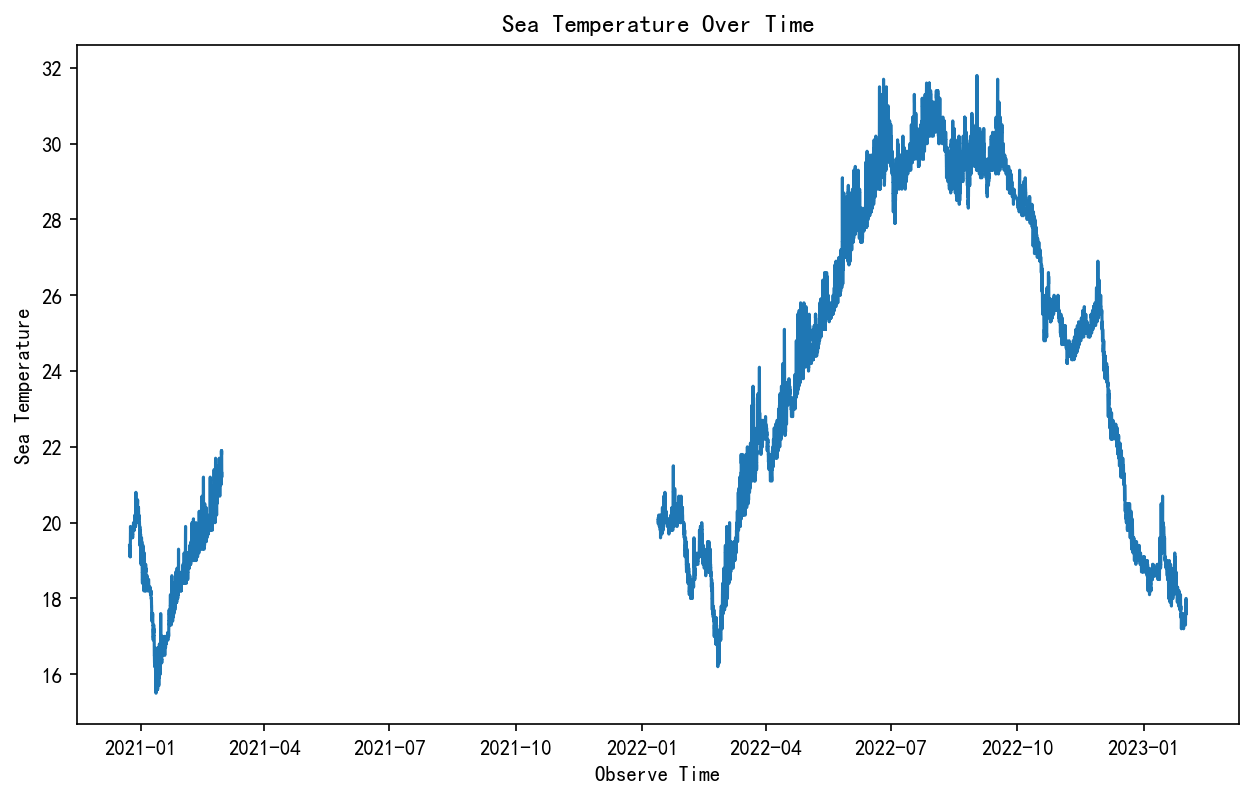

In [8]:
ds['SeaTemperature'].plot()
# 使用matplotlib 绘制 ds['SeaTemperature']，横轴为ds['ObserveTime']

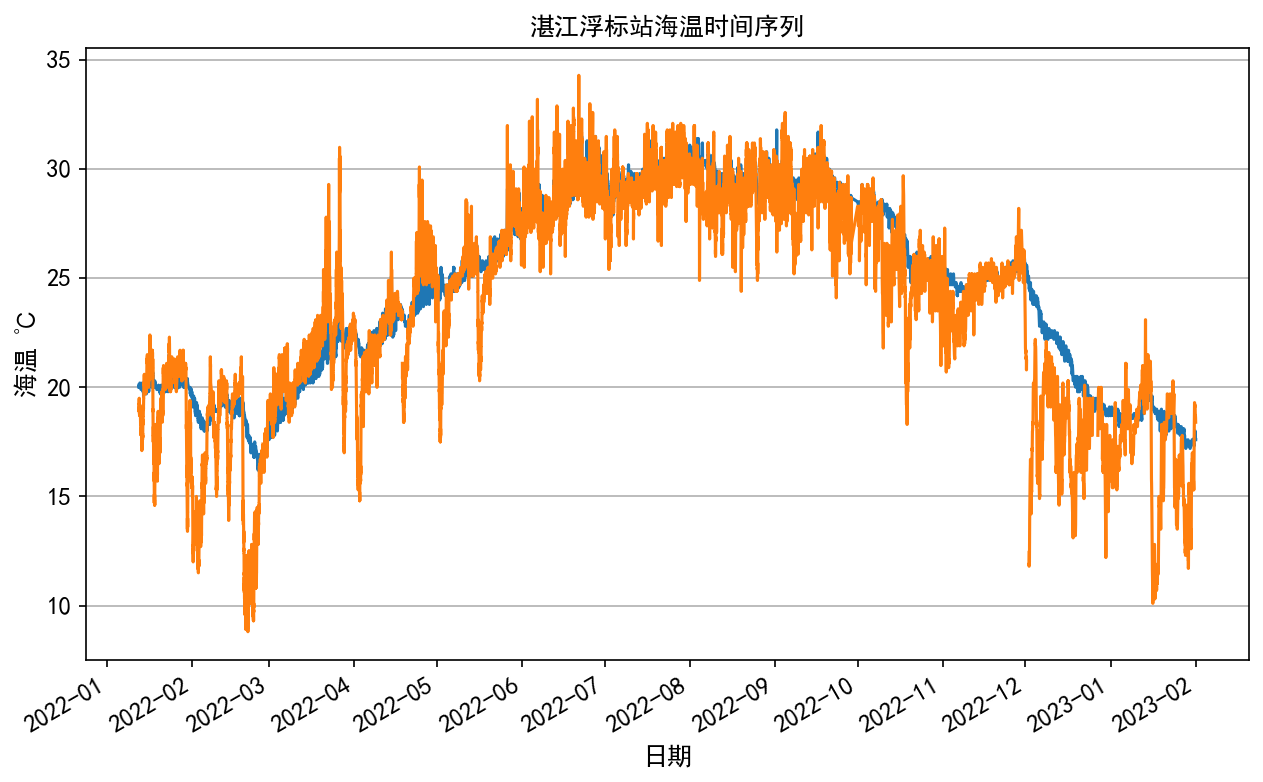

In [22]:


# 假设 ds 是你的 DataFrame
# ds = pd.read_csv("your_data.csv") 

# 如果 'ObserveTime' 不是 datetime 类型的话，你需要先将其转换为 datetime 类型
ds['ObserveTime'] = pd.to_datetime(ds['ObserveTime'])

# 筛选2021年12月之后的数据
filtered_ds = ds[ds['ObserveTime'] > '2021-12-31']

plt.figure(figsize=(10, 6), dpi=150)

# 绘制过滤后的数据
plt.plot_date(filtered_ds['ObserveTime'], filtered_ds['SeaTemperature'], '-')
plt.plot_date(filtered_ds['ObserveTime'], filtered_ds['Temperature'], '-')

plt.title('湛江浮标站海温时间序列')
plt.xlabel('日期', fontsize=12)
plt.ylabel('海温 ℃', fontsize=12)

# 添加Y轴网格线
plt.grid(axis='y')

# 设置X轴和Y轴的刻度字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

# 设置X轴的日期格式和间隔
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# 自动格式化X轴的日期表示，以防止其相互重叠
plt.gcf().autofmt_xdate()

plt.show()


In [6]:
h5_store = pd.HDFStore(os.path.normpath(os.path.join(file_dir, './data/G7425/G7425_202012to202301.hdf')), mode='w')
ds.to_hdf(h5_store, key='G7425', mode='a')
h5_store.close()


C:\Users\Henry\AppData\Local\Temp\ipykernel_26548\3998362413.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['StationID'], dtype='object')]

  ds.to_hdf(h5_store, key='G7425', mode='a')
